<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q7 PyTorch (40 points)

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**

While you were able to derive manual back-propagation rules for sigmoid and fully-connected layers, wouldn't it be nice if someone did that for lots of useful primatives and made it fast and easy to use for general computation?  Meet [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation). Since we have high-dimensional inputs (images) and low-dimensional outputs (a scalar loss), it turns out **forward mode AD** is very efficient. Popular autodiff packages include [pytorch](https://pytorch.org/) (Facebook), [tensorflow](https://www.tensorflow.org/) (Google), [autograd](https://github.com/HIPS/autograd) (Boston-area academics). Autograd provides its own replacement for numpy operators and is a drop-in replacement for numpy, except you can ask for gradients now. The other two are able to act as shim layers for [cuDNN](https://developer.nvidia.com/cudnn), an implementation of auto-diff made by Nvidia for use on their GPUs. Since GPUs are able to perform large amounts of math much faster than CPUs, this makes the former two packages very popular for researchers who train large networks. Tensorflow asks you to build a computational graph using its API, and then is able to pass data through that graph. PyTorch builds a dynamic graph and allows you to mix autograd functions with normal python code much more smoothly, so it is currently more popular among CMU students. 

We will use [pytorch](https://pytorch.org/) as a framework. Many computer vision projects use neural networks as a basic building block, so familiarity with one of these frameworks is a good skill to develop. Here, we basically replicate and slightly expand our handwritten character recognition networks, but do it in PyTorch instead of doing it ourselves. Feel free to use any tutorial you like, but we like [the offical one](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) or [this tutorial](http://cs231n.stanford.edu/notebooks/pytorch_tutorial.ipynb) (in a jupyter notebook) or [these slides](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture08.pdf (starting from number 35).

**For this section, you're free to implement these however you like. All of the tasks required here are fairly small and don't require a GPU if you use small networks. Including 7.2.**

### Q7.1 Train a neural network in PyTorch

#### Q7.1.1 (10 Points Code+WriteUp)
 
Re-write and re-train your fully-connected network on NIST36 in PyTorch. Plot training accuracy and loss over time.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

In [3]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *
import torch
import torch.utils.data as tdata
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets
import matplotlib.pyplot as plt

Net(
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=36, bias=True)
)


/home/punit13/personal/venv/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


itr: 00 	 loss: 37884.90 	 acc : 0.09 	 val_acc : 0.21
itr: 02 	 loss: 32201.19 	 acc : 0.36 	 val_acc : 0.41
itr: 04 	 loss: 26293.07 	 acc : 0.49 	 val_acc : 0.50
itr: 06 	 loss: 21909.83 	 acc : 0.56 	 val_acc : 0.56
itr: 08 	 loss: 18872.23 	 acc : 0.60 	 val_acc : 0.59
itr: 10 	 loss: 16780.87 	 acc : 0.63 	 val_acc : 0.62
itr: 12 	 loss: 15335.79 	 acc : 0.65 	 val_acc : 0.63
itr: 14 	 loss: 14252.22 	 acc : 0.67 	 val_acc : 0.65
itr: 16 	 loss: 13444.51 	 acc : 0.68 	 val_acc : 0.66
itr: 18 	 loss: 12795.00 	 acc : 0.70 	 val_acc : 0.67
itr: 20 	 loss: 12267.17 	 acc : 0.70 	 val_acc : 0.67
itr: 22 	 loss: 11796.83 	 acc : 0.71 	 val_acc : 0.68
itr: 24 	 loss: 11393.50 	 acc : 0.72 	 val_acc : 0.69
itr: 26 	 loss: 11035.64 	 acc : 0.73 	 val_acc : 0.70
itr: 28 	 loss: 10743.41 	 acc : 0.74 	 val_acc : 0.70
itr: 30 	 loss: 10451.23 	 acc : 0.74 	 val_acc : 0.71
itr: 32 	 loss: 10183.69 	 acc : 0.75 	 val_acc : 0.71
itr: 34 	 loss: 9958.35 	 acc : 0.76 	 val_acc : 0.71
itr: 36 	 l

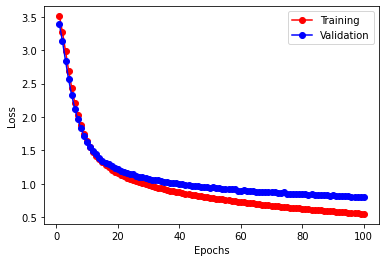

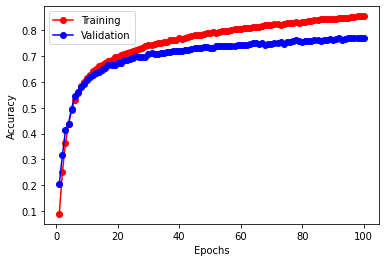

In [7]:
max_iters = 100
lr = 1e-3
batch_size = 4

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

tensor_trainx = torch.Tensor(train_x)
tensor_trainy = torch.Tensor(train_y)
tensor_valx = torch.Tensor(valid_x)
tensor_valy = torch.Tensor(valid_y)

train_dataset = tdata.TensorDataset(tensor_trainx, tensor_trainy)
val_dataset = tdata.TensorDataset(tensor_valx, tensor_valy)

trainloader = tdata.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = tdata.DataLoader(val_dataset, batch_size=valid_x.shape[0])

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1024, 64)
        self.fc2 = nn.Linear(64, 36)
        
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        x = self.fc2(F.sigmoid(self.fc1(x)))
#         x = self.fc2(self.sigmoid(self.fc1(x)))
#         x = self.softmax(x)
        return x

net = Net()
print(net)

criterion = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(net.parameters(), lr=lr)

train_loss = []
train_acc = []
val_loss = []
val_acc = []


for itr in range(max_iters):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_acc = 0.0
    for i, data in enumerate(trainloader):
        x, y = data
        labels = torch.argmax(y, axis=1)

        optim.zero_grad()

        outputs = net(x)
        loss = criterion(outputs, labels)
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        avg_acc += (torch.sum(labels == torch.argmax(outputs, axis=1)) / len(labels))
    
    train_loss.append(running_loss)
    train_acc.append(avg_acc / len(trainloader))
    
    x, y = next(iter(valloader))
    labels = torch.argmax(y, axis=1)
    outputs = net(x)
    loss = criterion(outputs, labels)
    
    val_loss.append(loss.item())
    val_acc.append(torch.sum(labels == torch.argmax(outputs, axis=1)) / len(labels))
    
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f} \t val_acc : {:.2f}".format(
            itr, train_loss[-1], train_acc[-1], val_acc[-1]))


print('Finished Training')

train_loss = [loss / train_x.shape[0] for loss in train_loss]
val_loss = [loss / valid_x.shape[0] for loss in val_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_loss, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(list(range(1, max_iters + 1)), train_acc, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_acc, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Q7.1.2 (3 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on MNIST. Plot training accuracy and loss over time.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

device = cpu
Get dataset
dataset size train, test
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc4): Linear(in_features=288, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=84, bias=True)
  (fc6): Linear(in_features=84, out_features=10, bias=True)
)
itr: 00 	 loss: 61338.98 	 acc : 0.63
itr: 02 	 loss: 3845.63 	 acc : 0.98
itr: 04 	 loss: 2303.63 	 acc : 0.99
itr: 06 	 loss: 1620.64 	 acc : 0.99
itr: 08 	 loss: 1205.42

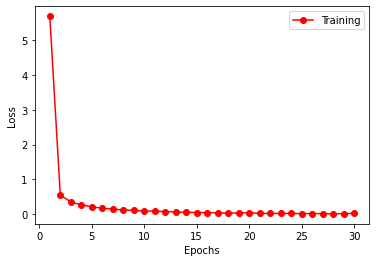

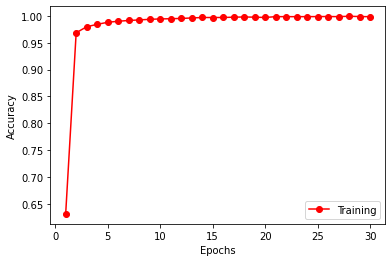

Test Accuracy - 0.9912999868392944


In [10]:
import numpy as np
import scipy.io
import torch
import torchvision
from torch import nn, optim
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from time import time

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

print("Get dataset")
mnist_train = MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
trainset_loader = DataLoader(mnist_train, batch_size=20, shuffle=True, num_workers=1)

mnist_test = MNIST(root="data", train=False, download=True, transform=transforms.ToTensor())
testset_loader = DataLoader(mnist_test, batch_size=len(mnist_train), shuffle=False, num_workers=1)

print("dataset size train, test")
print(trainset_loader.dataset.data.shape)
print(testset_loader.dataset.data.shape)

max_iters = 30
lr = 1e-3
batch_size = 4

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # layer 1 - Input -> Conv(5x5x1x6) -> Pool(f=2, s=2)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        
        # layer 2 - Input -> Conv(5x5x6x16) -> Pool(f=2, s=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        
        # layer 3 - Input -> Conv(5x5x16x32) -> Pool(f=2, s=2)
        self.conv3 = nn.Conv2d(16, 32, 5, padding=2)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # layer4 - (288) -> 120
        self.fc4 = nn.Linear(288, 120)
        
        # layer5 - (120) -> 84
        self.fc5 = nn.Linear(120, 84)
        
        # layer6 - 84 - 10
        self.fc6 = nn.Linear(84, 10)   

    def forward(self, x):        
        #one forward pass
        z1 = self.conv1(x)
        a1 = self.pool1(F.relu(z1))
        
        z2 = self.conv2(a1)
        a2 = self.pool2(F.relu(z2))
        
        z3 = self.conv3(a2)
        a3 = self.pool3(F.relu(z3))
        
        z4 = self.fc4(self.flatten(a3))
        a4 = F.relu(z4)
        
        z5 = self.fc5(a4)
        a5 = F.relu(z5)
        
        out = self.fc6(a5)
        
        return out

net = Net()
print(net)

criterion = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(net.parameters(), lr=lr)

train_loss = []
train_acc = []

for itr in range(max_iters):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_acc = 0.0
    for i, data in enumerate(trainset_loader):
        x, y = data

        optim.zero_grad()

        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        
        avg_acc += (torch.sum(y == torch.argmax(outputs, axis=1)) / len(y))

    train_loss.append(running_loss)
    train_acc.append(avg_acc / len(trainset_loader))
    
#     x, y = next(iter(valset_loader))
#     labels = torch.argmax(y, axis=1)
#     outputs = net(x)
#     loss = criterion(outputs, labels)
    
#     val_loss.append(loss.item())
#     val_acc.append(torch.sum(labels == torch.argmax(outputs, axis=1)) / len(labels))
    
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(
            itr, train_loss[-1], train_acc[-1]))


print('Finished Training')

train_loss = [loss / train_x.shape[0] for loss in train_loss]
val_loss = [loss / valid_x.shape[0] for loss in val_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
# plt.plot(list(range(1, max_iters + 1)), val_loss, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(list(range(1, max_iters + 1)), train_acc, 'ro-', label='Training')
# plt.plot(list(range(1, max_iters + 1)), val_acc, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

data, labels = next(iter(testset_loader))
test_outputs = net(data)
acc = torch.sum(labels == torch.argmax(test_outputs, dim=1)) / data.shape[0]

print('Test Accuracy - {0}'.format(acc))

#### Q7.1.3 (2 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the included NIST36 dataset. Plot training accuracy and loss over time.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

device = cpu
Get dataset
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc4): Linear(in_features=512, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=84, bias=True)
  (fc6): Linear(in_features=84, out_features=36, bias=True)
)
itr: 00 	 loss: 38716.52 	 acc : 0.03 	 val_acc : 0.04
itr: 02 	 loss: 38599.98 	 acc : 0.04 	 val_acc : 0.04
itr: 04 	 loss: 14725.30 	 acc : 0.59 	 val_acc : 0.68
itr: 06 	 loss: 6062.28 	 acc : 0.82 	 val_acc : 0.82
itr: 08 	 loss: 3985.12 	 acc : 0.

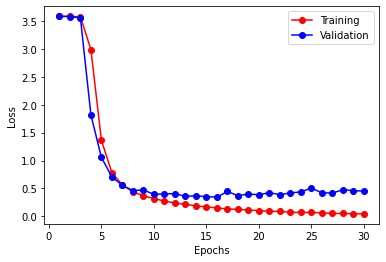

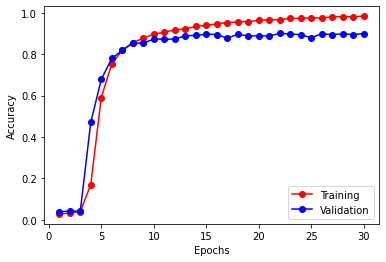

In [13]:
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from time import time
import matplotlib.pyplot as plt

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

print("Get dataset")
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'].astype(np.float32), train_data['train_labels'].astype(np.int)
valid_x, valid_y = valid_data['valid_data'].astype(np.float32), valid_data['valid_labels'].astype(np.int)

max_iters = 30
lr = 1e-3
batch_size = 16

tensor_trainx = torch.Tensor(train_x.reshape(-1, 1, 32, 32))
tensor_trainy = torch.Tensor(train_y)
tensor_valx = torch.Tensor(valid_x.reshape(-1, 1, 32, 32))
tensor_valy = torch.Tensor(valid_y)

train_dataset = tdata.TensorDataset(tensor_trainx, tensor_trainy)
val_dataset = tdata.TensorDataset(tensor_valx, tensor_valy)

trainloader = tdata.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = tdata.DataLoader(val_dataset, batch_size=valid_x.shape[0])

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # layer 1 - Input -> Conv(5x5x1x6) -> Pool(f=2, s=2)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        
        # layer 2 - Input -> Conv(5x5x6x16) -> Pool(f=2, s=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        
        # layer 3 - Input -> Conv(5x5x16x32) -> Pool(f=2, s=2)
        self.conv3 = nn.Conv2d(16, 32, 5, padding=2)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # layer4 - (512) -> 120
        self.fc4 = nn.Linear(512, 120)
        
        # layer5 - (120) -> 84
        self.fc5 = nn.Linear(120, 84)
        
        # layer6 - 84 - 10
        self.fc6 = nn.Linear(84, 36)   

    def forward(self, x):        
        #one forward pass
        z1 = self.conv1(x)
        a1 = self.pool1(F.relu(z1))
        
        z2 = self.conv2(a1)
        a2 = self.pool2(F.relu(z2))
        
        z3 = self.conv3(a2)
        a3 = self.pool3(F.relu(z3))
        
        z4 = self.fc4(self.flatten(a3))
        a4 = F.relu(z4)
        
        z5 = self.fc5(a4)
        a5 = F.relu(z5)
        
        out = self.fc6(a5)
        
        return out

net = Net()
print(net)

criterion = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(net.parameters(), lr=lr)

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for itr in range(max_iters):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_acc = 0.0
    for i, data in enumerate(trainloader):
        x, y = data
        labels = torch.argmax(y, axis=1)
        
        optim.zero_grad()

        outputs = net(x)
        loss = criterion(outputs, labels)
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        
        avg_acc += (torch.sum(labels == torch.argmax(outputs, axis=1)) / len(y))
    
    train_loss.append(running_loss)
    train_acc.append(avg_acc / len(trainloader))
    
    x, y = next(iter(valloader))
    labels = torch.argmax(y, axis=1)
    outputs = net(x)
    loss = criterion(outputs, labels)
    
    val_loss.append(loss.item())
    val_acc.append(torch.sum(labels == torch.argmax(outputs, axis=1)) / len(labels))
    
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f} \t val_acc : {:.2f}".format(
            itr, train_loss[-1], train_acc[-1], val_acc[-1]))


print('Finished Training')

train_loss = [loss / train_x.shape[0] for loss in train_loss]
val_loss = [loss / valid_x.shape[0] for loss in val_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_loss, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(list(range(1, max_iters + 1)), train_acc, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_acc, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# data, labels = next(iter(testset_loader))
# test_outputs = net(data)
# acc = torch.sum(labels == torch.argmax(test_outputs, dim=1)) / data.shape[0]

# print('Test Accuracy - {0}'.format(acc))

#### Q7.1.4 (15 Points Code+WriteUp)
 
Train a convolutional neural network with PyTorch on the EMNIST Balanced dataset  (available in *torchvision.datasets*, use *balanced* split) and evaluate it on the findLetters bounded boxes from the images folder. Find the accuracy on these bounded boxes.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

device = cpu
Get dataset
torch.Size([112800, 28, 28])
torch.Size([18800, 28, 28])
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc4): Linear(in_features=288, out_features=120, bias=True)
  (fc5): Linear(in_features=120, out_features=84, bias=True)
  (fc6): Linear(in_features=84, out_features=47, bias=True)
)
itr: 00 	 loss: 213718.59 	 acc : 0.48
itr: 02 	 loss: 47840.56 	 acc : 0.85
itr: 04 	 loss: 39670.89 	 acc : 0.87
itr: 06 	 loss: 35816.64 	 acc : 0.88
itr: 08 	 loss: 33160.23 	 acc : 0.89
itr: 

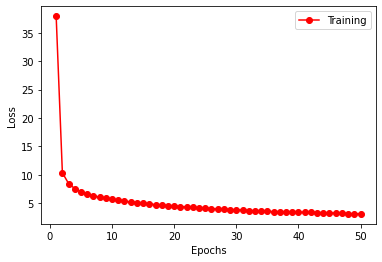

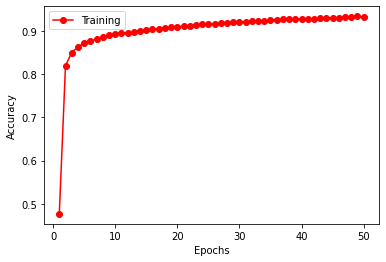

Test Accuracy - 0.800000011920929


In [2]:
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from time import time

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

print("Get dataset")

EMNIST.url = 'http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip'
# Reference for transform function
# https://stackoverflow.com/a/54513835
transform=torchvision.transforms.Compose([
    lambda img: torchvision.transforms.functional.rotate(img, -90),
    lambda img: torchvision.transforms.functional.hflip(img),
    torchvision.transforms.ToTensor()
])
emnist_train = EMNIST(root="data", split='balanced', train=True, download=True, transform=transform)

trainset_loader = DataLoader(emnist_train, batch_size=20, shuffle=True, num_workers=1)

emnist_test = EMNIST(root="data", split='balanced', train=False, download=True, transform=transform)
testset_loader = DataLoader(emnist_test, batch_size=20, shuffle=True, num_workers=1)

# Ref: https://github.com/gaurav0651/emnist/blob/master/train_emnist.ipynb
label_map = ['0','1','2','3','4','5','6','7','8','9',
       'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
       'a','b','d','e','f','g','h','n','q','r','t']

print(trainset_loader.dataset.data.shape)
print(testset_loader.dataset.data.shape)

max_iters = 50
lr = 1e-3
batch_size = 4

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # layer 1 - Input -> Conv(5x5x1x6) -> Pool(f=2, s=2)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        
        # layer 2 - Input -> Conv(5x5x6x16) -> Pool(f=2, s=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        
        # layer 3 - Input -> Conv(5x5x16x32) -> Pool(f=2, s=2)
        self.conv3 = nn.Conv2d(16, 32, 5, padding=2)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # layer4 - (288) -> 120
        self.fc4 = nn.Linear(288, 120)
        
        # layer5 - (120) -> 84
        self.fc5 = nn.Linear(120, 84)
        
        # layer6 - 84 - 47
        self.fc6 = nn.Linear(84, 47)   

    def forward(self, x):        
        #one forward pass
        z1 = self.conv1(x)
        a1 = self.pool1(F.relu(z1))
        
        z2 = self.conv2(a1)
        a2 = self.pool2(F.relu(z2))
        
        z3 = self.conv3(a2)
        a3 = self.pool3(F.relu(z3))
        
        z4 = self.fc4(self.flatten(a3))
        a4 = F.relu(z4)
        
        z5 = self.fc5(a4)
        a5 = F.relu(z5)
        
        out = self.fc6(a5)
        
        return out

net = Net()
print(net)

criterion = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(net.parameters(), lr=lr)

train_loss = []
train_acc = []

for itr in range(max_iters):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_acc = 0.0
    for i, data in enumerate(trainset_loader):
        x, y = data

        optim.zero_grad()

        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        
        avg_acc += (torch.sum(y == torch.argmax(outputs, axis=1)) / len(y))
    
    train_loss.append(running_loss)
    train_acc.append(avg_acc / len(trainset_loader))
    
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(
            itr, train_loss[-1], train_acc[-1]))


print('Finished Training')

train_loss = [loss / len(trainset_loader) for loss in train_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(list(range(1, max_iters + 1)), train_acc, 'ro-', label='Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

data, labels = next(iter(testset_loader))
test_outputs = net(data)
acc = torch.sum(labels == torch.argmax(test_outputs, dim=1)) / data.shape[0]

print('Test Accuracy - {0}'.format(acc))

# Saving model for inference 
torch.save(net.state_dict(), 'q7_1_4_weights.pt')

Get dataset


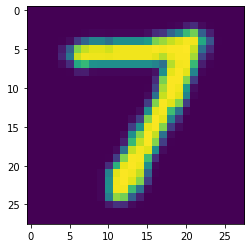

device = cpu


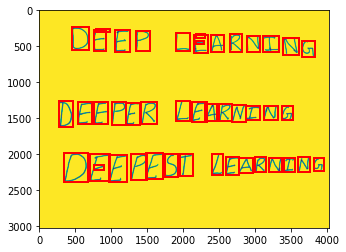

D Er E P L Ern A R N I N G
D E E P E R L E A R N I N G
D E E P E S T L
V E A R N I N G


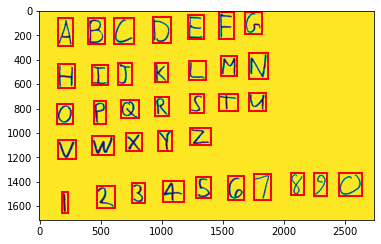

A B C D E F G
H I J K L M N
0 P Q R S T U
V W X Y Z
b 2 3 4 S G 7 8 9 0


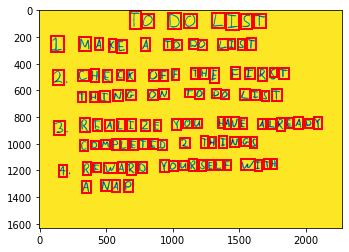

TO DO LIST
2 MAKE A TOPO CIST
2 CHECK OFETHE FZRaT
THINa ON rOOO LFST
3 REA HAV
C 9LI
HLT2EY2OU
O E ED THFNEgSALREAPY
A ARtNVAAPRD XOURSELF WFTH


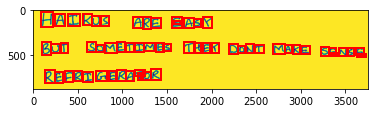

HA I KUS ARE EnASY
BUT SOMETIMES THEX DONT MAKE SgfNgEr
REFRI GERAn70R


In [6]:
from ipynb.fs.defs.q4 import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import torch
from torch import nn, optim
import torchvision
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from time import time

print("Get dataset")

EMNIST.url = 'http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip'
# Reference for transform function
# https://stackoverflow.com/a/54513835
transform=torchvision.transforms.Compose([
    lambda img: torchvision.transforms.functional.rotate(img, -90),
    lambda img: torchvision.transforms.functional.hflip(img),
    torchvision.transforms.ToTensor()
])
emnist_train = EMNIST(root="data", split='balanced', train=True, download=True, transform=transform)

trainset_loader = DataLoader(emnist_train, batch_size=20, shuffle=True, num_workers=1)

emnist_test = EMNIST(root="data", split='balanced', train=False, download=True, transform=transform)
testset_loader = DataLoader(emnist_test, batch_size=20, shuffle=True, num_workers=1)

plt.imshow(next(iter(trainset_loader))[0][0].reshape(28, 28))
plt.show()


# Ref: https://github.com/gaurav0651/emnist/blob/master/train_emnist.ipynb
label_map = ['0','1','2','3','4','5','6','7','8','9',
       'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
       'a','b','d','e','f','g','h','n','q','r','t']

# Use GPU if available, otherwise stick with cpu
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print("device = {}".format(device))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # layer 1 - Input -> Conv(5x5x1x6) -> Pool(f=2, s=2)
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        
        # layer 2 - Input -> Conv(5x5x6x16) -> Pool(f=2, s=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        
        # layer 3 - Input -> Conv(5x5x16x32) -> Pool(f=2, s=2)
        self.conv3 = nn.Conv2d(16, 32, 5, padding=2)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # layer4 - (288) -> 120
        self.fc4 = nn.Linear(288, 120)
        
        # layer5 - (120) -> 84
        self.fc5 = nn.Linear(120, 84)
        
        # layer6 - 84 - 47
        self.fc6 = nn.Linear(84, 47)   

    def forward(self, x):        
        #one forward pass
        z1 = self.conv1(x)
        a1 = self.pool1(F.relu(z1))
        
        z2 = self.conv2(a1)
        a2 = self.pool2(F.relu(z2))
        
        z3 = self.conv3(a2)
        a3 = self.pool3(F.relu(z3))
        
        z4 = self.fc4(self.flatten(a3))
        a4 = F.relu(z4)
        
        z5 = self.fc5(a4)
        a5 = F.relu(z5)
        
        out = self.fc6(a5)
        
        return out

net = Net()
net.load_state_dict(torch.load('q7_1_4_weights.pt'))
net = net.float()
net.eval()

for img in os.listdir('images'):
    patches, bboxes = get_patches(img, 28, transpose=False)
    
    patches = 1 - patches
    
    # Network    
    x = torch.from_numpy(patches.reshape(len(patches), 1, 28, 28)).to(device).float()
    y_probs = net(x).detach().numpy()
    y = np.argmax(y_probs, axis=1)
    characters = [label_map[y[i]] for i in range(y.shape[0])]    
    show_sentences(patches, bboxes, characters)

### Q7.2 Fine Tuning

#### Q7.2.1 (10 Points Code+WriteUp)
 
Fine-tune a single layer classifier using pytorch on the [flowers 17](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html) (or [flowers 102](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html)!) dataset using [squeezenet1\_1](https://pytorch.org/docs/stable/torchvision/models.html), as well as an architecture you've designed yourself (*3 conv layers, followed 2 fc layers, it's standard [slide 6](http://cs231n.stanford.edu/slides/2018/cs231n_2018_lecture09.pdf)*) and trained from scratch. How do they compare? 
    
We include a script in `scripts/` to fetch the flowers dataset and extract it in a way that [PyTorch ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) can consume it, see [an example](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision), from **data/oxford-flowers17**. You should look at how SqueezeNet is [defined](https://github.com/pytorch/vision/blob/master/torchvision/models/squeezenet.py), and just replace the classifier layer. There exists a pretty good example for [fine-tuning](https://gist.github.com/jcjohnson/6e41e8512c17eae5da50aebef3378a4c) in PyTorch.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

len(val_dataset) = 340
len(test_dataset) = 340


Using cache found in /home/punit13/.cache/torch/hub/pytorch_vision_v0.10.0


itr: 00 	 loss: 1137.57 	 acc : 0.52 	 val_loss : 195.97 	 val_acc : 0.83
itr: 02 	 loss: 269.72 	 acc : 0.89 	 val_loss : 96.61 	 val_acc : 0.91
itr: 04 	 loss: 188.74 	 acc : 0.91 	 val_loss : 110.80 	 val_acc : 0.90
itr: 06 	 loss: 181.65 	 acc : 0.93 	 val_loss : 93.45 	 val_acc : 0.92
itr: 08 	 loss: 145.67 	 acc : 0.94 	 val_loss : 77.64 	 val_acc : 0.94
itr: 10 	 loss: 106.89 	 acc : 0.94 	 val_loss : 68.79 	 val_acc : 0.94
itr: 12 	 loss: 143.11 	 acc : 0.94 	 val_loss : 66.79 	 val_acc : 0.93
itr: 14 	 loss: 112.59 	 acc : 0.94 	 val_loss : 70.73 	 val_acc : 0.94
itr: 16 	 loss: 134.03 	 acc : 0.94 	 val_loss : 73.38 	 val_acc : 0.93
itr: 18 	 loss: 89.96 	 acc : 0.96 	 val_loss : 72.39 	 val_acc : 0.91
Finished Training


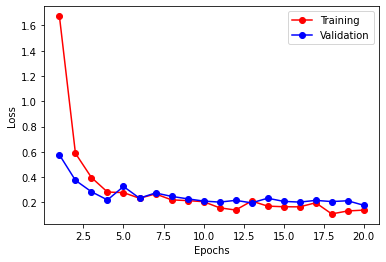

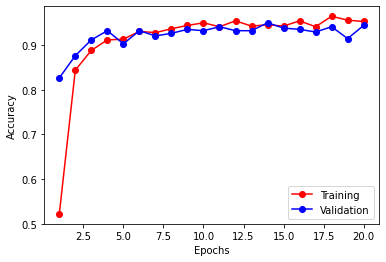

Test Accuracy - 0.9117646813392639


In [29]:
import torchvision

from torchvision import transforms

# Code for fine-tune squeezenet1_1
max_iters = 20
lr = 1e-3
batch_size = 4
num_classes = 17

train_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
train_dataset = torchvision.datasets.ImageFolder('data/flowers17/train', transform=train_transform)

val_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
val_dataset = torchvision.datasets.ImageFolder('data/flowers17/val', transform=val_transform)

test_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
test_dataset = torchvision.datasets.ImageFolder('data/flowers17/test', transform=test_transform)

print(f'{len(val_dataset) = }')
print(f'{len(test_dataset) = }')

trainloader = tdata.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = tdata.DataLoader(val_dataset, batch_size=len(val_dataset))
testloader = tdata.DataLoader(test_dataset, batch_size=len(test_dataset))

net = torch.hub.load('pytorch/vision:v0.10.0', 'squeezenet1_1', pretrained=True)
net.classifier[1] = nn.Conv2d(512, num_classes, 1)
net.num_classes = num_classes

for param in net.parameters():
    param.requires_grad = False
    
for param in net.classifier.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.Adam(net.parameters(), lr=lr)

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for itr in range(max_iters):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_acc = 0.0
    
    for i, data in enumerate(trainloader):
        x, y = data
        
        optim.zero_grad()
        
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        
        avg_acc += (torch.sum(y == torch.argmax(outputs, axis=1)) / len(y))
    
    train_loss.append(running_loss)
    train_acc.append(avg_acc / len(trainloader))
    
    x, y = next(iter(valloader))
    outputs = net(x)
    loss = criterion(outputs, y)
    
    val_loss.append(loss.item())
    val_acc.append(torch.sum(y == torch.argmax(outputs, axis=1)) / len(y))
    
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f} \t val_loss : {:.2f} \t val_acc : {:.2f}".format(
            itr, train_loss[-1], train_acc[-1], val_loss[-1], val_acc[-1]))


print('Finished Training')

train_loss = [loss / len(train_dataset) for loss in train_loss]
val_loss = [loss / len(val_dataset) for loss in val_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_loss, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(list(range(1, max_iters + 1)), train_acc, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_acc, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

data, labels = next(iter(testloader))
test_outputs = net(data)
acc = torch.sum(labels == torch.argmax(test_outputs, dim=1)) / data.shape[0]

print('Test Accuracy - {0}'.format(acc))

len(val_dataset) = 340
len(test_dataset) = 340
itr: 00 	 loss: 1862.86 	 acc : 0.07 	 val_loss : 847.02 	 val_acc : 0.13
itr: 02 	 loss: 1648.78 	 acc : 0.13 	 val_loss : 758.27 	 val_acc : 0.17
itr: 04 	 loss: 1484.91 	 acc : 0.23 	 val_loss : 672.99 	 val_acc : 0.28
itr: 06 	 loss: 1416.70 	 acc : 0.28 	 val_loss : 588.82 	 val_acc : 0.39
itr: 08 	 loss: 1287.04 	 acc : 0.35 	 val_loss : 567.38 	 val_acc : 0.41
itr: 10 	 loss: 1255.27 	 acc : 0.35 	 val_loss : 571.12 	 val_acc : 0.42
itr: 12 	 loss: 1151.01 	 acc : 0.44 	 val_loss : 510.33 	 val_acc : 0.49
itr: 14 	 loss: 1114.72 	 acc : 0.44 	 val_loss : 506.64 	 val_acc : 0.49
itr: 16 	 loss: 1007.75 	 acc : 0.47 	 val_loss : 576.80 	 val_acc : 0.46
itr: 18 	 loss: 978.55 	 acc : 0.51 	 val_loss : 509.68 	 val_acc : 0.53
itr: 20 	 loss: 942.66 	 acc : 0.52 	 val_loss : 503.69 	 val_acc : 0.50
itr: 22 	 loss: 985.88 	 acc : 0.50 	 val_loss : 447.10 	 val_acc : 0.59
itr: 24 	 loss: 885.84 	 acc : 0.54 	 val_loss : 468.89 	 val_acc : 

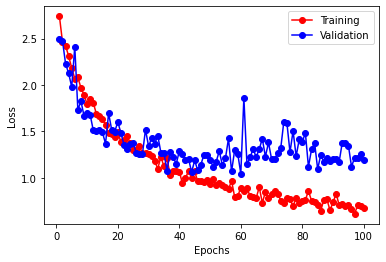

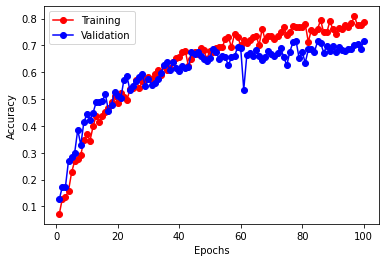

Test Accuracy - 0.7147058844566345


In [33]:
import torchvision

from torchvision import transforms

# Code for fine-tune squeezenet1_1
max_iters = 100
lr = 1e-3
batch_size = 4
num_classes = 17

train_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
train_dataset = torchvision.datasets.ImageFolder('data/flowers17/train', transform=train_transform)

val_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
val_dataset = torchvision.datasets.ImageFolder('data/flowers17/val', transform=val_transform)

test_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
test_dataset = torchvision.datasets.ImageFolder('data/flowers17/test', transform=test_transform)

print(f'{len(val_dataset) = }')
print(f'{len(test_dataset) = }')

trainloader = tdata.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = tdata.DataLoader(val_dataset, batch_size=len(val_dataset))
testloader = tdata.DataLoader(test_dataset, batch_size=len(test_dataset))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # layer 1 - Input -> Conv(5x5x1x6) -> Pool(f=2, s=2)
        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        
        # layer 2 - Input -> Conv(5x5x6x16) -> Pool(f=2, s=2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        
        # layer 3 - Input -> Conv(5x5x16x32) -> Pool(f=2, s=2)
        self.conv3 = nn.Conv2d(16, 32, 5, padding=2)
        self.pool3 = nn.MaxPool2d(2, stride=2)
        
        self.flatten = nn.Flatten()
        
        # layer4 - (25088) -> 256
        self.fc4 = nn.Linear(25088, 256)
        
        # layer5 - (256) -> 84
        self.fc5 = nn.Linear(256, 84)
        
        # layer6 - 84 - 17
        self.fc6 = nn.Linear(84, 17)   

    def forward(self, x):        
        #one forward pass
        z1 = self.conv1(x)
        a1 = self.pool1(F.relu(z1))
        
        z2 = self.conv2(a1)
        a2 = self.pool2(F.relu(z2))
        
        z3 = self.conv3(a2)
        a3 = self.pool3(F.relu(z3))
        
        z4 = self.fc4(self.flatten(a3))
        a4 = F.relu(z4)
        
        z5 = self.fc5(a4)
        a5 = F.relu(z5)
        
        out = self.fc6(a5)
        
        return out

net = Net()

criterion = nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.Adam(net.parameters(), lr=lr)

train_loss = []
train_acc = []
val_loss = []
val_acc = []

for itr in range(max_iters):  # loop over the dataset multiple times
    running_loss = 0.0
    avg_acc = 0.0
    
    for i, data in enumerate(trainloader):
        x, y = data
        
        optim.zero_grad()        
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        
        avg_acc += (torch.sum(y == torch.argmax(outputs, axis=1)) / len(y))
    
    train_loss.append(running_loss)
    train_acc.append(avg_acc / len(trainloader))
    
    x, y = next(iter(valloader))
    outputs = net(x)
    loss = criterion(outputs, y)
    
    val_loss.append(loss.item())
    val_acc.append(torch.sum(y == torch.argmax(outputs, axis=1)) / len(y))
    
    if itr % 2 == 0:
        print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f} \t val_loss : {:.2f} \t val_acc : {:.2f}".format(
            itr, train_loss[-1], train_acc[-1], val_loss[-1], val_acc[-1]))


print('Finished Training')

train_loss = [loss / len(train_dataset) for loss in train_loss]
val_loss = [loss / len(val_dataset) for loss in val_loss]

plt.plot(list(range(1, max_iters + 1)), train_loss, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_loss, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(list(range(1, max_iters + 1)), train_acc, 'ro-', label='Training')
plt.plot(list(range(1, max_iters + 1)), val_acc, 'bo-', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

data, labels = next(iter(testloader))
test_outputs = net(data)
acc = torch.sum(labels == torch.argmax(test_outputs, dim=1)) / data.shape[0]

print('Test Accuracy - {0}'.format(acc))